Loan Prediction System 📚
In this notebook, we are going to make an end to end project, Loan Prediction System we will also deploy it.

**Outline 📚**
    Loading and Exploring the data

    Working with Missing values

    Dropping Unecessary columns

    Visualization Or Making a Story Board

    Encoding the Categorical data

    Model Development

    Dividing the data

    Using GaussianNB

    Loss Function

    Using SVC With Grid Search CV

    XGBoost Classifier

    Decision Tree Using Randomized Search

    Random Forest Using Randomized Search

    Selecting and Saving the Model

    Coding a website🔥🔥

---



In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
train_data = pd.read_csv('drive/MyDrive/Colab Notebooks/ML/Loan Prediction/train_data.csv')

In [7]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
train_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [9]:
train_data.shape

(614, 13)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
def missing_values(df):
    return train_data.isnull().sum(0)

In [13]:
missing_values(train_data)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
train_data.drop(['Loan_ID', 'Dependents'], inplace=True, axis=1)

In [15]:
train_data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [16]:
# Dealing with Null Values [Categorical data]

cols_1 = train_data[['Gender', 'Married', 'Self_Employed']]

for i in cols_1:
    train_data[i].fillna(train_data[i].mode().iloc[0], inplace=True)

In [17]:
missing_values(train_data)

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
# Dealing with Null values [Numerical data]

cols_2 = train_data[['LoanAmount', 'Loan_Amount_Term', 'Credit_History']]

for i in cols_2:
    train_data[i].fillna(train_data[i].mean(axis=0), inplace=True)


In [19]:
missing_values(train_data)

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
# Visualization of the data

def bar_chart(col):
    Approved = train_data[train_data['Loan_Status']=='Y'][col].value_counts()
    Disapproved = train_data[train_data['Loan_Status']=='N'][col].value_counts()

    df = pd.DataFrame([Approved, Disapproved])

    df.index = ['Approved', 'Disapproved']
    df.plot(kind='bar')


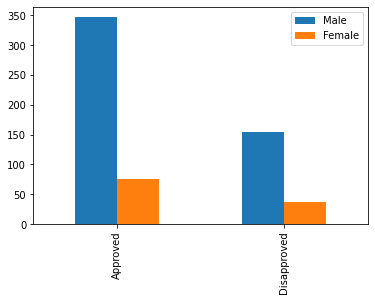

In [21]:
bar_chart("Gender")

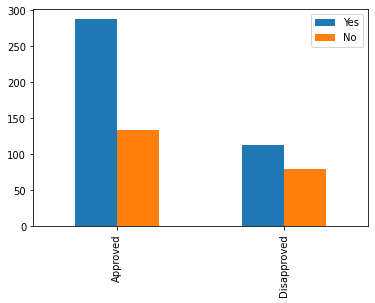

In [22]:
bar_chart("Married")

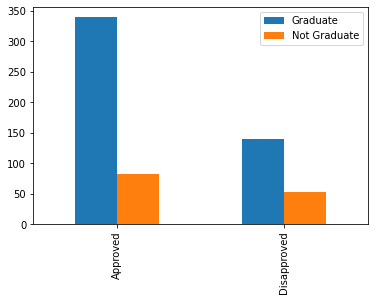

In [23]:
bar_chart("Education")

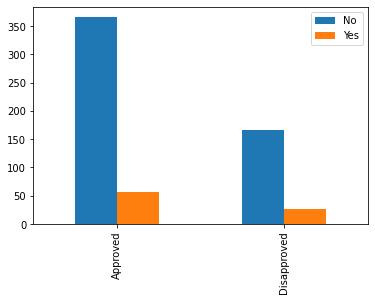

In [24]:
bar_chart("Self_Employed")

In [25]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

train_data[['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']] = ord_enc.fit_transform(train_data[['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']])

train_data = train_data.astype(int)

In [26]:
from sklearn.model_selection import train_test_split

x = train_data.drop("Loan_Status", axis=1)
y= train_data["Loan_Status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(491, 10)
(491,)
(123, 10)
(123,)


In [28]:
from sklearn.naive_bayes import GaussianNB

gfc = GaussianNB()
gfc.fit(x_train, y_train)
pred1 = gfc.predict(x_test)

In [29]:
pred1

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [30]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

def loss(y_true, y_pred):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)

    print(pre)
    print(rec)
    print(acc)

In [31]:
loss(y_test, pred1)

0.7777777777777778
0.9166666666666666
0.7642276422764228


In [32]:
from tensorflow import keras

nn_model = keras.Sequential([
                             keras.layers.Dense(16, activation='relu'),
                             keras.layers.Dense(16, activation='relu'),
                             keras.layers.Dense(16, activation='relu'),
                             keras.layers.Dense(1, activation='sigmoid')
])

In [33]:
from sklearn import metrics
nn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
                 loss=keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])

In [34]:
nn_model.evaluate(x_test, y_test)

4/4 [==============================] - 1s 3ms/step - loss: 744.7132 - accuracy: 0.3171


[744.7131958007812, 0.31707316637039185]

In [39]:
nn_model.fit(x_train, y_train, epochs=100, batch_size=5)

Epoch 1/100
99/99 [==============================] - 0s 3ms/step - loss: 8.3186 - accuracy: 0.5825
Epoch 2/100
99/99 [==============================] - 0s 3ms/step - loss: 4.9044 - accuracy: 0.5947
Epoch 3/100
99/99 [==============================] - 0s 2ms/step - loss: 8.0695 - accuracy: 0.5743
Epoch 4/100
99/99 [==============================] - 0s 3ms/step - loss: 4.6144 - accuracy: 0.6212
Epoch 5/100
99/99 [==============================] - 0s 4ms/step - loss: 5.8634 - accuracy: 0.5988
Epoch 6/100
99/99 [==============================] - 0s 4ms/step - loss: 3.2927 - accuracy: 0.5784
Epoch 7/100
99/99 [==============================] - 1s 7ms/step - loss: 4.3111 - accuracy: 0.6029
Epoch 8/100
99/99 [==============================] - 0s 4ms/step - loss: 4.6448 - accuracy: 0.6151
Epoch 9/100
99/99 [==============================] - 0s 5ms/step - loss: 3.0886 - accuracy: 0.6130
Epoch 10/100
99/99 [==============================] - 0s 5ms/step - loss: 4.3961 - accuracy: 0.6049
Epoch 11/

In [48]:
import joblib

joblib.dump(gfc, 'model.pkl')
model = joblib.load('model.pkl')
model.predict(x_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])